Rows:  394
Cols:  788
Lays:  3
iMax:  255
 
mn(im):  0
mx(im):  255
av(im):  0.9616809245278157
sd(im):  8.665665446286576
 
sum_col:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    1    0    2    2    4   11
   21   31    1    0    2    1    0    6   14   21  398  386   41   27
   14   22   19   18   26   36 1124 1141   28   29   37   36   39   41
   42   51 1668 1673   33   35   29   50   52   46   43   44 2448 2434
   68   78   

100%|██████████| 97/97 [00:00<00:00, 606.50it/s]


 
Duplicate points removed:  21
 
corr_beamlet:  [[1, 149.4206081081081, 557.4780405405405, 146, 153, 149.5, 554, 561, 557.5, 172.9140884241647, 568.9827590594964, 83], [2, 148.9842903575298, 589.8261105092091, 146, 153, 149.5, 587, 594, 590.5, 171.07715130357457, 584.9083881527222, 108], [3, 148.77133479212253, 600.1280087527352, 146, 153, 149.5, 599, 602, 600.5, 170.81517922504895, 589.901520499263, 63], [7, 164.46261298274445, 612.9745275267051, 161, 168, 164.5, 609, 618, 613.5, 175.5463394930642, 595.1566249243295, 14], [8, 164.24271844660194, 623.9448367166814, 161, 168, 164.5, 621, 628, 624.5, 174.2333465295253, 601.0959893244735, 54], [11, 180.6505728314239, 523.5859247135843, 179, 184, 181.5, 522, 527, 524.5, 184.68489582213152, 554.57970059263, 53], [13, 179.86890487609912, 545.677857713829, 177, 184, 180.5, 542, 550, 546.0, 189.10168959591607, 565.8265638335456, 68], [14, 180.57512274959083, 556.7855973813421, 177, 186, 181.5, 554, 561, 557.5, 187.84109104808226, 570.76730176

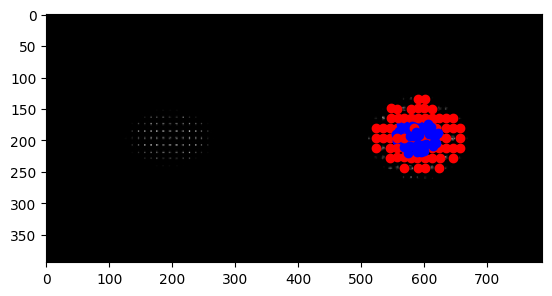

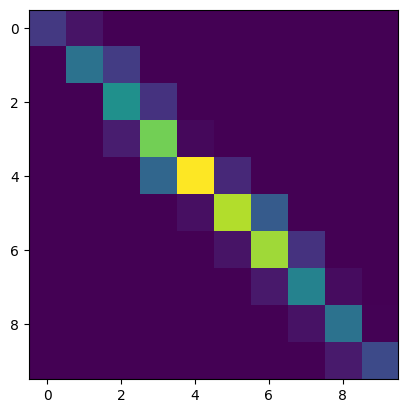

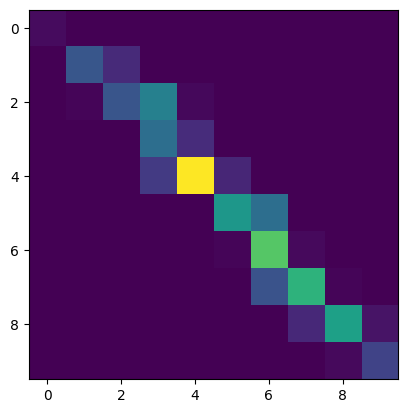

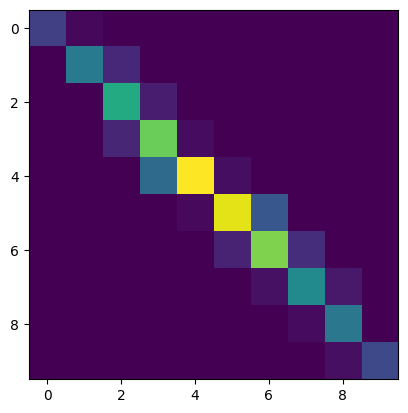

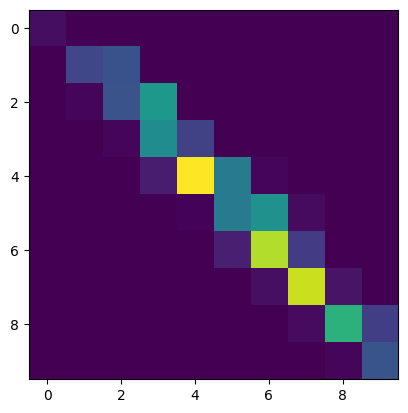

Done


: 

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 22 14:49:28 2020

@author: Alex Grabenhofer
"""
#---------------------------------------- 
# BM-02/13/22: Trying to simplify the code
#----------------------------------------

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

now = datetime.now()
t_stamp = datetime.timestamp(now)

""" Calibration """

""" Processing """

""" Go straight to read input image (BM-) """

#print('Please input the full path (C:/...) of the image that you wish to use')
#img_string = input('::  ')
# img_string = f"C:\\Users\\ianja\\REPOS\\Pepperpot\\local-images-before-after-propagation-2x-dataset\\epsnx0.1_alfax-0.296_betax425.73631_epsny0.1_alfay-0.55_betay170.0_epsnz5.0_alfaz0.1_betaz10.0_2.png"
img_string = f"C:\\Users\\ianja\\REPOS\\Pepperpot\\path_to_save_inverted_image.jpg"

frame = cv2.imread(img_string)

try:
#    im = frame.astype(np.float64)
    im = frame.astype(np.int64)
except AttributeError:
    print('Error.  Image not found.')
    print('If using loaded image, check spelling and path and try again.')
    fail = 1
    while fail == 1:
        print(' ')
        print('Please input the full path (C:/...) of the image that you wish to use')
        img_string = input('::  ')
        frame = cv2.imread(img_string)
        try:
#            im = frame.astype(np.float64)
            im = frame.astype(np.int)
            fail = 0
        except AttributeError:
            fail = 1

i_row = len(im)
i_col = len(im[0])

try:
    i_layer = len(im[0][0])
except TypeError:
    i_layer = 1

print('Rows: ',i_row)
print('Cols: ',i_col)
print('Lays: ',i_layer)

#im = im / np.max(im)
immax = np.max(im)
print('iMax: ',immax)
imn = im / immax

#plt.imshow(im,cmap = 'gray')

#plt.imshow(imn,cmap = 'gray')
#plt.show()

#quit() # BM: stop execution at this point
    
if i_layer == 3:
    i_01 = np.abs(im[:,:,0] - im[:,:,1])
    i_12 = np.abs(im[:,:,1] - im[:,:,2])
    i_02 = np.abs(im[:,:,0] - im[:,:,2])
    
    s_01 = np.sum(i_01)
    s_12 = np.sum(i_12)
    s_02 = np.sum(i_02)
    
    s_tot = s_01 + s_12 + s_02
    
    av_i = s_tot / (i_row * i_col)
    
    if av_i == 0: # all layers are the same
        im = im[:,:,0]
    if (av_i > 0) & (av_i < 0.01): # all layers are close, majority are identical
        im = (im[:,:,0] + im[:,:,1] + im[:,:,2]) / 3
    if (av_i > 0.01) & (av_i <= 0.74): # rgb colorspace
        val = 0.299 * im[:,:,0] + .587 * im[:,:,1] + .114 * im[:,:,2]
        im = val
    if av_i > 0.74: # hsv colorspace
        im = im[:,:,0]

# BM- Let's keep original image data, not normalized    
#im = im / np.max(im)
#n_im = im ** 2 # might remove

mn = np.min(im)
mx = np.max(im)
av = np.mean(im)
sd = np.std(im)

print(' ')
print('mn(im): ',mn)
print('mx(im): ',mx)
print('av(im): ',av)
print('sd(im): ',sd)

#quit() # BM: stop execution at this point

#if av + sd > 0.01:
#    thresh = av + sd
#if av + sd <= 0.01:
#    thresh = 0.1

thresh = av + sd
    
# mask_im = np.zeros((i_row,i_col))

#summed_col = np.sum(n_im,axis = 0)
#summed_row = np.sum(n_im,axis = 1)

summed_col = np.sum(im,axis = 0)
summed_row = np.sum(im,axis = 1)

print(' ')
print('sum_col: ',summed_col)
print(' ')
print('sum_row: ',summed_row)

m_c = np.mean(summed_col)
s_c = np.std(summed_col)

thresh_c = float(i_row+1) #m_c + s_c

m_r = np.mean(summed_row)
s_r = np.std(summed_row)

thresh_r = float(i_col+1) #m_r + s_r

print(' ')
print('thresh: ',thresh)
print('thresh_c: ',thresh_c)
print('thresh_r: ',thresh_r)

#quit() # BM: stop execution at this point

# Find min and max column based on maximum data and threshold values
pos_c = []
max_val = 0
c_c = 0

for n in range(len(summed_col)):
    row = []
    if summed_col[n] >= thresh_c:
        row.append(n)
        row.append(summed_col[n])
        if summed_col[n] > max_val:
            max_val = summed_col[n]
            max_pos = c_c
        pos_c.append(row)
        c_c = c_c + 1
        
print(' ')
print('pos_c: ',pos_c)

print(' ')
print('max_val: ',max_val)
print('max_pos: ',max_pos)

sep = np.diff(pos_c,axis = 0)
max_sep = np.max(sep[:,0])

print(' ')
print('sep: ',sep)
print('max_sep: ',max_sep)

if max_sep > i_col/10:         # BM- Why 10 and not 20?
    sep_thresh_c = np.mean(sep[:,0]) + np.std(sep[:,0])
else:
    sep_thresh_c = i_col/10
    
print(' ')
print('sep_thresh_c: ',sep_thresh_c)

# BM- Trying to remove far away peaks, most likely noise   

for n in range(max_pos,0,-1):
    if n - 1 < 0:
        break
    else:
        if pos_c[n][0] - pos_c[n-1][0] < sep_thresh_c:
            continue
        else:
            break

min_c_loc = n

for n in range(max_pos,len(pos_c)-1,1):
    if n + 1 > len(pos_c)-1:
        break
    else:
        if pos_c[n+1][0] - pos_c[n][0] < sep_thresh_c:
            continue
        else:
            break
        
max_c_loc = n

print(' ')
print('min_c_loc: ',min_c_loc)
print('max_c_loc: ',max_c_loc)

#quit() # BM: stop execution at this point

# Find min and max row based on maximum data and threshold values
pos_r = []
max_val = 0
c_r = 0

for n in range(len(summed_row)):
    row = []
    if summed_row[n] >= thresh_r:
        row.append(n)
        row.append(summed_row[n])
        if summed_row[n] > max_val:
            max_val = summed_row[n]
            max_pos = c_r
        pos_r.append(row)
        c_r = c_r + 1

print(' ')
print('pos_r: ',pos_r)

print(' ')
print('max_val: ',max_val)
print('max_pos: ',max_pos)

sep = np.diff(pos_r,axis = 0)
max_sep = np.max(sep[:,0])

print(' ')
print('sep: ',sep)
print('max_sep: ',max_sep)

if max_sep > i_row/10:                   # BM- Why 10 and not 20?
    sep_thresh_r = np.mean(sep[:,0]) + np.std(sep[:,0])
else:
    sep_thresh_r = i_row/10
    
print(' ')
print('sep_thresh_r: ',sep_thresh_r)

# BM- Trying to remove far away peaks, most likely noise   

for n in range(max_pos,0,-1):
    if n - 1 < 0:
        break
    else:
        if pos_r[n][0] - pos_r[n-1][0] < sep_thresh_r:
            continue
        else:
            break

min_r_loc = n

for n in range(max_pos,len(pos_r)-1,1):
    if n + 1 > len(pos_r)-1:
        break
    else:
        if pos_r[n+1][0] - pos_r[n][0] < sep_thresh_r:
            continue
        else:
            break
        
max_r_loc = n

print(' ')
print('min_r_loc: ',min_r_loc)
print('max_r_loc: ',max_r_loc)

#quit() # BM: stop execution at this point

# Group data to point locations of min/max for rows and columns (BM- to remove noise?)

# Column data                         (BM- Trying to find the starts and ends of peaks)
n = 0
pos_c_dat = []
pos_c_dat.append(pos_c[min_c_loc])

l_h = 1

for c_c in range(min_c_loc-1,max_c_loc-1,1):
    if pos_c[c_c+1][0] - pos_c[c_c][0] < sep_thresh_c/10:   # BM- Why 10 again?
        if l_h == 0:
            pos_c_dat.append(pos_c[c_c])
            l_h = l_h + 1
        else:
            continue
    else:
        pos_c_dat[n][l_h] = pos_c[c_c][0]
        if l_h == 1:
            l_h = 0
            n = n + 1
        else:
            l_h = l_h + 1

if n <= len(pos_c_dat)-1:
    pos_c_dat[n][1] = pos_c[max_c_loc][0]

print(' ')
print('pos_c_dat: ',pos_c_dat)

# Row data                           (BM- Trying to find the starts and ends of peaks)
n = 0
pos_r_dat = []
pos_r_dat.append(pos_r[min_r_loc])

l_h = 1

for c_r in range(min_r_loc - 1, max_r_loc - 1,1):
    if pos_r[c_r+1][0] - pos_r[c_r][0] < sep_thresh_r/10:    # BM- Why 10 again?
        if l_h == 0:
            pos_r_dat.append(pos_r[c_r])
            l_h = l_h + 1
        else:
            continue
    else:
        pos_r_dat[n][l_h] = pos_r[c_r][0]
        if l_h == 1:
            l_h = 0
            n = n + 1
        else:
            l_h = l_h + 1

if n <= len(pos_r_dat)-1:
    pos_r_dat[n][1] = pos_r[max_r_loc][0]

print(' ')
print('pos_r_dat: ',pos_r_dat)

#quit() # BM: stop execution at this point

# Refine centroid regions, modify mask, and calculate centroids
n = 0
pts = []

#if sd/av > 10: # indicates relatively clean data (low noise)
#    chk_thresh = sd/av * thresh
#else:
#    chk_thresh = 1 - 4*thresh

chk_thresh = sd/av * thresh   # BM- Using un-normalized image.

print(' ')
print('chk_thresh: ',chk_thresh)

for c_r in range(0,len(pos_r_dat)-1,1):
    for c_c in range(0,len(pos_c_dat)-1,1):
        min_r = pos_r_dat[c_r][0]
        max_r = pos_r_dat[c_r][1]
        min_c = pos_c_dat[c_c][0]
        max_c = pos_c_dat[c_c][1]
        
        if (min_r < 0) | (max_r > i_row-1) | (min_c < 0) | (max_c > i_col-1):
            continue
        
        chk_im = []
        mx_chk_im = 0
        mx_loc = [0,0]
        for sub_r in range(min_r,max_r+1,1):
            row = []
            for sub_c in range(min_c,max_c+1,1):
                val = im[sub_r][sub_c]
                if val > mx_chk_im:
                    mx_chk_im = val
                    mx_loc[0] = sub_r
                    mx_loc[1] = sub_c
                row.append(val)
                
            chk_im.append(row)
        
        if mx_chk_im < chk_thresh:
            continue
        else:
# refine centroid region            
            chk_r = mx_loc[0] - 1# + min_r - 1
            chk_c = mx_loc[1] - 1 # + min_c - 1
            cr = chk_r
            cc = chk_c
# minimum row calculation            
            while im[cr][cc] > thresh:
                cr = cr - 1
                if cr == -1:
                    break
                if im[cr][cc] <= thresh:
                    cc = cc - 1
                    if im[cr][cc] <= thresh:
                        cc = cc + 2
                        
            min_r = cr + 1
                
            cr = chk_r
            cc = chk_c
# maximum row calculation            
            while im[cr][cc] > thresh:
                cr = cr + 1
                if cr > i_row - 1:
                    break
                if im[cr][cc] <= thresh:
                    cc = cc - 1
                    if im[cr][cc] <= thresh:
                        cc = cc + 2
            
            max_r = cr - 1
            
            cr = chk_r
            cc = chk_c
# minimum column calculation
            while im[cr][cc] > thresh:
                cc = cc - 1
                if cc == -1:
                    break
                if im[cr][cc] <= thresh:
                    cr = cr - 1
                    if im[cr][cc] <= thresh:
                        cr = cr + 2
            
            min_c = cc + 1
            
            cr = chk_r
            cc = chk_c
# maximum column calculation
            while im[cr][cc] > thresh:
                cc = cc + 1
                if cc > i_col - 1:
                    break
                if im[cr][cc] <= thresh:
                    cr = cr - 1
                    if im[cr][cc] <= thresh:
                        cr = cr + 2
                        
            max_c = cc - 1
            
# calculate centroid
            
            sum_int = 0
            for r in range(min_r,max_r,1):
                for c in range(min_c,max_c,1):
                    sum_int = sum_int + im[r][c]
                    
            if sum_int == 0:
                continue
            
            cent_r = 0
            for r in range(min_r,max_r,1):
                for c in range(min_c,max_c,1):
                    cent_r = cent_r + (r * im[r][c])
                    
            cent_r = cent_r / sum_int
            
            cent_c = 0
            for c in range(min_c,max_c,1):
                for r in range(min_r,max_r,1):
                    cent_c = cent_c + (c * im[r][c])
                    
            cent_c = cent_c / sum_int
            
            pt_row = []
            pt_row.append(cent_r) #0
            pt_row.append(cent_c) #1
            pt_row.append(min_r) #2
            pt_row.append(max_r) #3
            pt_row.append(min_c) #4
            pt_row.append(max_c) #5
            pt_row.append(im[round(cent_r)][round(cent_c)]) #6
            
            pts.append(pt_row)
            
            n = n + 1
            
print(' ')
print("Primary centroids found:",n)

print(' ')
print('pts: ',pts)

#quit() # BM: stop execution at this point

# Calculate centroid statistics (separation and rotation)

primary_pts = n - 1

d = []
o = []

for n1 in range(len(pts)):
    d_row = []
    o_row = []
    for n2 in range(len(pts)):
        if n1 == n2:
            continue
        else:
            dx = pts[n1][1] - pts[n2][1]
            dy = pts[n1][0] - pts[n2][0]
            if dx <= 0:
                continue
            else:
                d_row.append(np.sqrt((dx**2) + (dy**2)))
                o_row.append(np.degrees(np.arctan(dy/dx)))
    if d_row == []:
        continue
    else:    
        d.append(d_row)
        o.append(o_row)

print(' ')
print('distances, d: ',d)
print('angles, o: ',o)
    
# Find mimimum separation and associated angles
min_d_o = []

for crnt_pt in range(len(d)):
    loc = []
    min_d = d[crnt_pt][0]
    for n in range(len(d[crnt_pt])):
        val = d[crnt_pt][n]
        if val < min_d:
            min_d = val
            loc = [crnt_pt,n]
    if loc == []:
        continue
    else:
        min_d_o.append([min_d,o[loc[0]][loc[1]]])
        
print(' ')
print('min d and o: ',min_d_o)

#quit() # BM: stop execution at this point

# Clean up data by removing long distances and near 90/0 degree rotations
av_d = np.mean(min_d_o,axis = 0)[0]
d_o = []

for n in range(len(min_d_o)):
    if min_d_o[n][0] > av_d:
        continue
    else:
        d_o.append([min_d_o[n][0],min_d_o[n][1]])
        
for n in range(len(d_o)):
    val = d_o[n][1]
    if val > 45:
        d_o[n][1] = 90 - d_o[n][1]
    if val < -45:
        d_o[n][1] = -90 - d_o[n][1]
        
dat = []

for n in range(len(d_o)):
    if d_o[n][1] == 0:
        continue
    else:
        dat.append([d_o[n][0],d_o[n][1]])
        
print(' ')
print('dat: ',dat)

#quit() # BM: stop execution at this point

# Calculate rotation angle

max_d = np.max(dat,0)[0] # used to be min, max appears to be more accurate
mean_d = np.mean(dat,0)[0]
mean_o = np.mean(np.abs(dat),0)[1]

for n in range(len(dat)):
    val = dat[n][0]
    if val == max_d:
        max_d_loc = n
        break

max_deg = dat[max_d_loc][1]
deg_dir = np.sign(max_deg)

deg = deg_dir * mean_o

if np.isnan(deg) == True:
    deg = 0

print(' ')
print('mean_d: ',mean_d)
print('mean_o: ',mean_o)
print('deg: ',deg)

#quit() # BM: stop execution at this point

# Find missing data

# Create prediction/search grid
r_1 = pts[0][0]
c_1 = pts[0][1]

dist = mean_d

sep_h = abs(dist * np.cos(np.radians(deg)))
sep_v = abs(dist * np.sin(np.radians(deg)))

num_step_l = np.floor(c_1/sep_h)
num_step_r = np.floor((i_col-c_1)/sep_h)
step_h = int(num_step_l + num_step_r)

num_step_u = np.floor(r_1/sep_h)
num_step_d = np.floor((i_row-r_1)/sep_h)
step_v = int(num_step_u + num_step_d)

slp = - np.sign(deg)

if slp == 1:
    r_0 = (r_1 - (num_step_l * sep_v)) - (num_step_u * sep_h)
    c_0 = (c_1 - (num_step_l * sep_h)) - (num_step_u * sep_h)
if slp == -1:
    r_0 = (r_1 + (num_step_l * sep_v)) - (num_step_u * sep_h)
    c_0 = (c_1 - (num_step_l * sep_h)) - (num_step_u * sep_v)

r_a = r_0
c_a = c_0

chk_grid = []

step_r = 0

while r_a <= i_row:
    for step_c in range(0,step_h,1):
        r = r_a + (slp * step_c * sep_v)
        c = c_a + (step_c * sep_h)
        if (r < 0) | (r > i_row - 1):
            continue
        if (c < 0) | (c > i_col - 1):
            continue
        chk_grid.append([round(r),round(c)])

    step_r = step_r + 1
    r_a = r_0 + (step_r * sep_h)
    c_a = c_0 + (-slp * step_r * sep_v)

print(' ')
print('chk_grid: ',chk_grid)

#quit() # BM: stop execution at this point

# Use grid values to search for missing data

row_diff = []
col_diff = []

for n in range(len(pts)):
    row_diff.append(pts[n][3]-pts[n][2])
    col_diff.append(pts[n][5]-pts[n][4])

if thresh == 0.1:
    row_rad = np.ceil(np.max(row_diff)/2)
    col_rad = np.ceil(np.max(col_diff)/2)
else:
    row_rad = np.floor(np.min(row_diff)/2)
    col_rad = np.floor(np.min(col_diff)/2)

t_r = np.min(row_diff)
t_c = np.min(col_diff)

tot_pts = t_r * t_c # minimum acceptable size of possible data

for c_pt in range(len(chk_grid)):
    min_r = int(chk_grid[c_pt][0] - row_rad)
    max_r = int(chk_grid[c_pt][0] + row_rad)
    min_c = int(chk_grid[c_pt][1] - col_rad)
    max_c = int(chk_grid[c_pt][1] + col_rad)
    
    next_pt = 0
    
# Determine if a new point is already contained in centroid
    for chk in range(len(pts)):
        if (chk_grid[c_pt][0] <= pts[chk][3]) & (chk_grid[c_pt][0] >= pts[chk][2]) & (chk_grid[c_pt][1] <= pts[chk][5]) & (chk_grid[c_pt][1] >= pts[chk][4]):
            next_pt = 1

    if (min_r < 0) | (max_r > i_row - 1) | (min_c < 1) | (max_c > i_col - 1) | (next_pt == 1):
        continue
    
    chk_im = []
    mx_chk_im = 0
    mx_loc = [0,0]
    for cr in range(min_r,max_r+1,1): # +1 necessary to include max_r
        row = []
        for cc in range(min_c,max_c+1,1):
            val = im[cr][cc]
            row.append(val)
            if val > mx_chk_im:
                mx_chk_im = val
                mx_loc = [cr,cc]
            
        chk_im.append(row)
        
# Refine centroid max and min

    if mx_chk_im < thresh:
        continue
    else:
        chk_r = mx_loc[0]
        chk_c = mx_loc[1]
        cr = chk_r
        cc = chk_c
# minimum row calculation
        while im[cr][cc] > thresh:
            cr = cr - 1
            if cr == -1:
                break
            if im[cr][cc] <= thresh:
                cc = cc - 1
                if im[cr][cc] <= thresh:
                    cc = cc + 2
        
        min_r = cr + 1
        
        cr = chk_r
        cc = chk_c
# maximum row calculation
        while im[cr][cc] > thresh:
            cr = cr + 1
            if cr > i_row - 1:
                break
            if im[cr][cc] <= thresh:
                cc = cc - 1
                if im[cr][cc] <= thresh:
                    cc = cc + 2
        
        max_r = cr - 1
        
        cr = chk_r
        cc = chk_c
# minimum column calculation
        while im[cr][cc] > thresh:
            cc = cc - 1
            if cc == -1:
                break
            if im[cr][cc] <= thresh:
                cr = cr - 1
                if im[cr][cc] <= thresh:
                    cr = cr + 2
        
        min_c = cc + 1
        
        cr = chk_r
        cc = chk_c
# maximum column calculation
        while im[cr][cc] > thresh:
            cc = cc + 1
            if cc > i_col - 1:
                break
            if im[cr][cc] <= thresh:
                cr = cr - 1
                if im[cr][cc] <= thresh:
                    cr = cr + 2
                    
        max_c = cc - 1

# Calculate centroid
        sum_int = 0
        sum_pts = 0
        
        for r in range(min_r,max_r+1,1):
            for c in range(min_c,max_c+1,1):
                sum_int = sum_int + im[r][c]
                sum_pts = sum_pts + 1
                
        if (sum_int < (thresh * sum_pts)) | (sum_pts < tot_pts):
            continue
        
# Calculate row centroid
        cent_r = 0
        for r in range(min_r,max_r+1,1):
            for c in range(min_c,max_c+1,1):
                cent_r = cent_r + (r * im[r][c])
                
        cent_r = cent_r / sum_int
        
# Calculate column centroid
        cent_c = 0
        for c in range(min_c,max_c+1,1):
            for r in range(min_r,max_r+1,1):
                cent_c = cent_c + (c * im[r][c])
                
        cent_c = cent_c / sum_int
        
# Update points
        pt_row = []
        pt_row.append(cent_r)
        pt_row.append(cent_c)
        pt_row.append(min_r)
        pt_row.append(max_r)
        pt_row.append(min_c)
        pt_row.append(max_c)
        pt_row.append(im[round(cent_r)][round(cent_c)])
        
        pts.append(pt_row)
        
print(' ')
print("Final data/centroids found:",len(pts))

print(' ')
print('pts: ',pts)

#quit() # BM: stop execution at this point

## The following section is being modified in order to work with calibration data.
# Find center point of data

m_pt = [0,0] #average of the location of all the points/beamlets

for n in range(len(pts)):
    m_pt[0] = m_pt[0] + pts[n][0]
    m_pt[1] = m_pt[1] + pts[n][1]
    
m_pt[0] = m_pt[0] / len(pts)
m_pt[1] = m_pt[1] / len(pts) 


d_pts = []

for n in range(len(pts)):
    r = pts[n][0]
    c = pts[n][1]
    d = np.sqrt(((r - m_pt[0])**2) + ((c - m_pt[1])**2))
    if n == 0:
        min_d = [r,c,d]
        
    if d < 1.7 * dist:  # 1.7 factor selected based on preliminary test data
        d_pts.append([r,c,d])
        if d < min_d[2]:
            min_d = [r,c,d]
            
if min_d[2] < dist/2:
    b_cntr = [min_d[0],min_d[1]]
else:
    b_cntr = [0,0]
    for n in range(len(d_pts)):
        b_cntr[0] = b_cntr[0] + d_pts[n][0]
        b_cntr[1] = b_cntr[1] + d_pts[n][1]
        
    b_cntr[0] = b_cntr[0] / (n + 1)
    b_cntr[1] = b_cntr[1] / (n + 1)
##

print(' ')
print('b_cntr_x: ',b_cntr[1])
print('b_cntr_y: ',b_cntr[0])

print(' ')
print("Missing data found")

#quit() # BM: stop execution at this point

# Recalculate rotation degree using full data set.

# Create screen data based around beam central point if no calibration data exists
#if calib_type == 'NONE':   #BM- Use hard-coded calibration data below

# Calibration data suggest that resolution is 0.0412 mm/pix
# Also suggests that spacing between mask holes is 1.5 mm? for stable and 1.2 mm? for radioactive.
# Distance from mask to screen is 20 mm? for stable, 13.7 mm for radioactive.
    
# input number of holes x/y
num_x = 40 # was 25
num_y = 40 # was 25
    
# input hole separation based on minimum separation data (used to be 36.4) #BM- Particular case?
sep_x = np.min(dat,0)[0]
sep_y = np.min(dat,0)[0]
c_sep = np.min(dat,0)[0]
    
# generate locations
r_1 = b_cntr[0]
c_1 = b_cntr[1]
    
sep_h = abs(sep_x * np.cos(np.radians(deg)))
sep_v = abs(sep_x * np.sin(np.radians(deg)))
    
n_step_l = np.floor(num_x/2)
n_step_r = np.floor(num_x/2)
n_step_u = np.floor(num_y/2)
n_step_d = np.floor(num_y/2)
    
slp = -(deg/abs(deg))
    
if slp == 1:
    r_0 = (r_1 - (n_step_l * sep_v)) - (n_step_u * sep_h)
    c_0 = (c_1 - (n_step_l * sep_h)) - (n_step_u * sep_v)
if slp == -1:
    r_0 = (r_1 + (n_step_l * sep_v)) - (n_step_u * sep_h)
    c_0 = (c_1 - (n_step_l * sep_h)) - (n_step_u * sep_v)
            
scrn_grid = []
    
r_a = r_0
c_a = c_0
    
step_v = int(n_step_u + n_step_d)
step_h = int(n_step_l + n_step_r)
    
for step_r in range(1,step_v + 2,1):
    for step_c in range(0,step_h + 1,1):
        r = r_a + (slp * step_c * sep_v)
        c = c_a + (step_c * sep_h)
        if (r < 0) | (r > i_row):
            continue
        if (c < 0) | (c > i_col):
            continue
        scrn_grid.append([round(r),round(c)])
        
    r_a = r_0 + (step_r * sep_h)
    c_a = c_0 + (-slp * step_r * sep_v)
    
cntr = b_cntr

print(' ')
print('scrn_grid: ',scrn_grid)

#quit() # BM: stop execution at this point
    
# Rotate screen to match data points
cx = cntr[1]
cy = cntr[0]

for n in range(len(scrn_grid)):
    x = scrn_grid[n][1] - cx
    y = scrn_grid[n][0] - cy
    
    r_x = x * np.cos(np.radians(deg)) + y * np.sin(np.radians(deg))
    r_y = -x * np.sin(np.radians(deg)) + y * np.cos(np.radians(deg))
    
    scrn_grid[n][1] = r_x + cx
    scrn_grid[n][0] = r_y + cy

# Match center point with screen location
x0 = b_cntr[1]
y0 = b_cntr[0]

for n in range(len(scrn_grid)):
    x = scrn_grid[n][1]
    y = scrn_grid[n][0]
    
    dx = x0 - x
    dy = y0 - y
    
    d = np.sqrt(dx**2 + dy**2)
    
    if n == 0:
        min_d = d
        min_loc = n
    else:
        if d < min_d:
            min_d = d
            min_loc = n

c_cntr = [scrn_grid[min_loc][0],scrn_grid[min_loc][1]]

print(' ')
print('c_cntr_x: ',c_cntr[1])
print('c_cntr_y: ',c_cntr[0])

#quit() # BM: stop execution at this point

# Determine offset (parallel nature of beam)
# By looking at the offset of the "central" point from the correlated screen location,
# we can determine the incident angle on the screen.
# This information will help discern the transverse momentum of the beam and allow more
# accurate measurement of the emittance.  Remove this intrinsic momentum from final momentum.
# Calculate the momentum from the offset and subtract later!

#if calib_type == 'NONE':   #BM- Use hard-coded calibration data
off_x = 0
off_y = 0
#else:
#    off_x = b_cntr[1] - c_cntr[1]
#    off_y = b_cntr[0] - c_cntr[0]
    
# Correlate beam data
print(' ')
print("Corellating data...")

r0 = b_cntr[0]
c0 = b_cntr[1]

s_r0 = c_cntr[0]
s_c0 = c_cntr[1]

raw_corr = []
corr_beamlet = []
c_pt = 1

for n in tqdm(range(len(pts))):
    r = pts[n][0]
    c = pts[n][1]
    
    b_step_r = round((r - r0) / dist)
    b_step_c = round((c - c0) / dist)
    
    bad_pt = 0
    for m in range(len(scrn_grid)):
        s_r = scrn_grid[m][0]
        s_c = scrn_grid[m][1]
        
        c_step_r = round((s_r - s_r0) / c_sep)
        c_step_c = round((s_c - s_c0) / c_sep)
        if (c_step_r == b_step_r) & (c_step_c == b_step_c):
            break
        if m == len(scrn_grid) - 1:
            bad_pt = 1
    if bad_pt == 1:
        continue
    else:
        s_r = scrn_grid[m][0]
        s_c = scrn_grid[m][1]
        
        row = []
        row.append(c_pt)
        row.append(r)
        row.append(c)
        row.append(pts[n][2])
        row.append(pts[n][3])
        row.append((pts[n][2] + pts[n][3])/2)
        row.append(pts[n][4])
        row.append(pts[n][5])
        row.append((pts[n][4] + pts[n][5])/2)
        row.append(s_r)
        row.append(s_c)
        row.append(pts[n][6])
        
        raw_corr.append(row)
        
        c_pt = c_pt + 1

dbl_pts = 0

for n in range(len(raw_corr)):
    r1 = raw_corr[n][9]
    c1 = raw_corr[n][10]
    bad_pt = 0
    for m in range(n,len(raw_corr)):
        if m == n:
            continue
        r2 = raw_corr[m][9]
        c2 = raw_corr[m][10]
        if (r1 == r2) & (c1 == c2):
            dbl_pts = dbl_pts + 1
            bad_pt = 1
            break
    if bad_pt == 1:
        continue
    else:
        corr_beamlet.append(raw_corr[n])

# corr_beamlet = raw_corr

print(' ')
print("Duplicate points removed: ",dbl_pts)

print(' ')
print('corr_beamlet: ',corr_beamlet)

#quit() # BM: stop execution at this point

beamlet = []

for b_let in range(len(corr_beamlet)):
    min_r = corr_beamlet[b_let][3]
    max_r = corr_beamlet[b_let][4]
    min_c = corr_beamlet[b_let][6]
    max_c = corr_beamlet[b_let][7]
    for r in range(min_r,max_r,1):
        for c in range(min_c,max_c,1):
            beamlet.append([b_let+1,r,c,im[r][c]])
            # mask_im[r][c] = 1

print(' ')
print("Data corellated.")

print(' ')
print('Nb. of beamlets: ',len(beamlet))
print('beamlet: ',beamlet)

#quit() # BM: stop execution at this point

# Rotate data

r_corr_beamlet = np.zeros((len(corr_beamlet),len(corr_beamlet[0])))
r_beamlet = np.zeros((len(beamlet),len(beamlet[0])))

r_deg = -deg

cx = cntr[1]
cy = cntr[0]

for r in range(len(corr_beamlet)):
    r_corr_beamlet[r][0] = corr_beamlet[r][0] # beamlet number
    
    x = corr_beamlet[r][2] - cx
    y = corr_beamlet[r][1] - cy
    
    x_min = corr_beamlet[r][6] - cx
    y_min = corr_beamlet[r][3] - cy
    
    x_max = corr_beamlet[r][7] - cx
    y_max = corr_beamlet[r][4] - cy
    
    x_cent = corr_beamlet[r][8] - cx
    y_cent = corr_beamlet[r][5] - cy
    
    x_scrn = corr_beamlet[r][10] - cx
    y_scrn = corr_beamlet[r][9] - cy
    
    r_x = x * np.cos(np.radians(r_deg)) + y * np.sin(np.radians(r_deg))
    r_corr_beamlet[r][2] = r_x + cx
    r_y = -x * np.sin(np.radians(r_deg)) + y * np.cos(np.radians(r_deg))
    r_corr_beamlet[r][1] = r_y + cy
    
    r_x_min = x_min * np.cos(np.radians(r_deg)) + y_min * np.sin(np.radians(r_deg))
    r_corr_beamlet[r][6] = r_x_min + cx
    r_y_min = -x_min * np.sin(np.radians(r_deg)) + y_min * np.cos(np.radians(r_deg))
    r_corr_beamlet[r][3] = r_y_min + cy
    
    r_x_max = x_max * np.cos(np.radians(r_deg)) + y_max * np.sin(np.radians(r_deg))
    r_corr_beamlet[r][7] = r_x_max + cx
    r_y_max = -x_max * np.sin(np.radians(r_deg)) + y_max * np.cos(np.radians(r_deg))
    r_corr_beamlet[r][4] = r_y_max + cy
    
    r_x_cent = x_cent * np.cos(np.radians(r_deg)) + y_cent * np.sin(np.radians(r_deg))
    r_corr_beamlet[r][8] = r_x_cent + cx
    r_y_cent = -x_cent * np.sin(np.radians(r_deg)) + y_cent * np.cos(np.radians(r_deg))
    r_corr_beamlet[r][5] = r_y_cent + cy
    
    r_x_scrn = x_scrn * np.cos(np.radians(r_deg)) + y_scrn * np.sin(np.radians(r_deg))
    r_corr_beamlet[r][10] = r_x_scrn + cx
    r_y_scrn = -x_scrn * np.sin(np.radians(r_deg)) + y_scrn * np.cos(np.radians(r_deg))
    r_corr_beamlet[r][9] = r_y_scrn + cy


for r in range(len(beamlet)):
    r_beamlet[r][0] = beamlet[r][0]
    
    x = beamlet[r][2] - cx
    y = beamlet[r][1] - cy
    
    r_x = x * np.cos(np.radians(deg)) + y * np.sin(np.radians(deg))
    r_y = -x * np.sin(np.radians(deg)) + y * np.cos(np.radians(deg))
    
    r_beamlet[r][2] = r_x + cx
    r_beamlet[r][1] = r_y + cy
    
    r_beamlet[r][3] = beamlet[r][3]

print(' ')
print("Rotated Data - beamlet")

print(' ')
print('Nb. of r_beamlet: ',len(r_beamlet))
print('r_beamlet: ',r_beamlet)

#quit() # BM: stop execution at this point

# Calculate emittance (rotated and non-rotated frames)
print(' ')
print("Caluculating emittance...")

# Convert to mm from pixels
#if calib_type == 'NONE':  #BM- Use hard-coded calibration data below
scale = 0.1 #was 1 # place holders since no calibration data is present
d = 100 #was 50
#else:
#    scale = pix_calib
#    d = 50 # mm separation between grid and phosphor

offset_x = cntr[1]
offset_y = cntr[0]

blet_mm = []
r_blet_mm = []

corr_blet_mm = []
r_corr_blet_mm = []

for n in range(len(r_beamlet)):
    x = (r_beamlet[n][2] - offset_x) * scale
    y = (r_beamlet[n][1] - offset_y) * scale
    r_blet_mm.append([r_beamlet[n][0],y,x,r_beamlet[n][3]])
    
    x = (beamlet[n][2] - offset_x) * scale
    y = (beamlet[n][1] - offset_y) * scale
    blet_mm.append([beamlet[n][0],y,x,beamlet[n][3]])
    
for n in range(len(r_corr_beamlet)):
    rcb0 = r_corr_beamlet[n][0]
    rcb1 = (r_corr_beamlet[n][1] - offset_y) * scale
    rcb2 = (r_corr_beamlet[n][2] - offset_x) * scale
    rcb3 = (r_corr_beamlet[n][3] - offset_y) * scale
    rcb4 = (r_corr_beamlet[n][4] - offset_y) * scale
    rcb5 = (r_corr_beamlet[n][5] - offset_y) * scale
    rcb6 = (r_corr_beamlet[n][6] - offset_x) * scale
    rcb7 = (r_corr_beamlet[n][7] - offset_x) * scale
    rcb8 = (r_corr_beamlet[n][8] - offset_x) * scale
    rcb9 = (r_corr_beamlet[n][9] - offset_y) * scale
    rcb10 = (r_corr_beamlet[n][10] - offset_x) * scale
    r_corr_blet_mm.append([rcb0,rcb1,rcb2,rcb3,rcb4,rcb5,rcb6,rcb7,rcb8,rcb9,rcb10])
    
    cb0 = corr_beamlet[n][0]
    cb1 = (corr_beamlet[n][1] - offset_y) * scale
    cb2 = (corr_beamlet[n][2] - offset_x) * scale
    cb3 = (corr_beamlet[n][3] - offset_y) * scale
    cb4 = (corr_beamlet[n][4] - offset_y) * scale
    cb5 = (corr_beamlet[n][5] - offset_y) * scale
    cb6 = (corr_beamlet[n][6] - offset_x) * scale
    cb7 = (corr_beamlet[n][7] - offset_x) * scale
    cb8 = (corr_beamlet[n][8] - offset_x) * scale
    cb9 = (corr_beamlet[n][9] - offset_y) * scale
    cb10 = (corr_beamlet[n][10] - offset_x) * scale
    corr_blet_mm.append([cb0,cb1,cb2,cb3,cb4,cb5,cb6,cb7,cb8,cb9,cb10])
    
# Calculate x' and y'

r_xy_p = []
xy_p = []

for n in range(len(r_blet_mm)):
    b_num = int(r_beamlet[n][0] - 1)
    
    r_x_p_mm = (r_blet_mm[n][2] - r_corr_blet_mm[b_num][10]) / d *1000  #BM- rad -> mrad
    r_y_p_mm = (r_blet_mm[n][1] - r_corr_blet_mm[b_num][9]) / d *1000  #BM- rad -> mrad
    
    x_p_mm = (blet_mm[n][2] - corr_blet_mm[b_num][10]) / d *1000  #BM- rad -> mrad
    y_p_mm = (blet_mm[n][1] - corr_blet_mm[b_num][9]) / d *1000  #BM- rad -> mrad
    
    r_xy_p.append([r_y_p_mm, r_x_p_mm])
    xy_p.append([y_p_mm, x_p_mm])
    
# Generate heat maps
val = []

xs = []
xps = []
ys = []
yps = []

rxs = []
rxps = []
rys = []
ryps = []

for n in range(len(blet_mm)):
    val.append(blet_mm[n][3])
    
    xs.append(blet_mm[n][2])
    xps.append(xy_p[n][1])
    ys.append(blet_mm[n][1])
    yps.append(xy_p[n][0])
    
    rxs.append(r_blet_mm[n][2])
    rxps.append(r_xy_p[n][1])
    rys.append(r_blet_mm[n][1])
    ryps.append(r_xy_p[n][0])

x_phase_im, xedges, yedges = np.histogram2d(xs, xps, bins=(10,10))
y_phase_im, xedges, yedges = np.histogram2d(ys, yps, bins=(10,10))

r_x_phase_im, xedges, yedges = np.histogram2d(rxs, rxps, bins=(10,10))
r_y_phase_im, xedges, yedges = np.histogram2d(rys, ryps, bins=(10,10))

print('Heatmaps created.')

# Calculate emittance values

tot_int = np.sum(val)

x_av = 0
xp_av = 0

r_x_av = 0
r_xp_av = 0

y_av = 0
yp_av = 0

r_y_av = 0
r_yp_av = 0

for n in range(len(val)):
    x_av = x_av + (xs[n] * val[n])
    xp_av = xp_av + (xps[n] * val[n])
    
    r_x_av = r_x_av + (rxs[n] * val[n])
    r_xp_av = r_xp_av + (rxps[n] * val[n])
    
    y_av = y_av + (ys[n] * val[n])
    yp_av = yp_av + (yps[n] * val[n])
    
    r_y_av = r_y_av + (rys[n] * val[n])
    r_yp_av = r_yp_av + (ryps[n] * val[n])

x_av = x_av / tot_int
xp_av = xp_av / tot_int

r_x_av = r_x_av / tot_int
r_xp_av = r_xp_av / tot_int

y_av = y_av / tot_int
yp_av = yp_av / tot_int

r_y_av = r_y_av / tot_int
r_yp_av = r_yp_av / tot_int

sq_x_av = 0
sq_xp_av = 0
x_xp_av = 0

r_sq_x_av = 0
r_sq_xp_av = 0
r_x_xp_av = 0

sq_y_av = 0
sq_yp_av = 0
y_yp_av = 0

r_sq_y_av = 0
r_sq_yp_av = 0
r_y_yp_av = 0

"""
for n in range(len(val)):
    sq_x_av = sq_x_av + (((xs[n] - x_av)**2) * val[n])
    sq_xp_av = sq_xp_av + (((xps[n] - xp_av)**2) * val[n])
    x_xp_av = x_xp_av + (((xs[n] - x_av)*(xps[n] - xp_av)) * val[n])
    
    r_sq_x_av = r_sq_x_av + (((rxs[n] - r_x_av)**2) * val[n])
    r_sq_xp_av = r_sq_xp_av + (((rxps[n] - r_xp_av)**2) * val[n])
    r_x_xp_av = r_x_xp_av + (((rxs[n] - r_x_av)*(rxps[n] - r_xp_av)) * val[n])
    
    sq_y_av = sq_y_av + (((ys[n] - y_av)**2) * val[n])
    sq_yp_av = sq_yp_av + (((yps[n] - yp_av)**2) * val[n])
    y_yp_av = y_yp_av + (((ys[n] - y_av)*(yps[n] - yp_av)) * val[n])
    
    r_sq_y_av = r_sq_y_av + (((rys[n] - r_y_av)**2) * val[n])
    r_sq_yp_av = r_sq_yp_av + (((ryps[n] - r_yp_av)**2) * val[n])
    r_y_yp_av = r_y_yp_av + (((rys[n] - r_y_av)*(ryps[n] - r_yp_av)) * val[n])

sq_x_av = sq_x_av / tot_int
sq_xp_av = sq_xp_av / tot_int
x_xp_av = x_xp_av / tot_int

r_sq_x_av = r_sq_x_av / tot_int
r_sq_xp_av = r_sq_xp_av / tot_int
r_x_xp_av = r_x_xp_av / tot_int

sq_y_av = sq_y_av / tot_int
sq_yp_av = sq_yp_av / tot_int
y_yp_av = y_yp_av / tot_int

r_sq_y_av = r_sq_y_av / tot_int
r_sq_yp_av = r_sq_yp_av / tot_int
r_y_yp_av = r_y_yp_av / tot_int
"""
for n in range(len(val)):
    sq_x_av = sq_x_av + (xs[n]**2 * val[n])
    sq_xp_av = sq_xp_av + (xps[n]**2 * val[n])
    x_xp_av = x_xp_av + (xs[n]*xps[n] * val[n])
    
    r_sq_x_av = r_sq_x_av + (rxs[n]**2 * val[n])
    r_sq_xp_av = r_sq_xp_av + (rxps[n]**2 * val[n])
    r_x_xp_av = r_x_xp_av + (rxs[n]*rxps[n] * val[n])
    
    sq_y_av = sq_y_av + (ys[n]**2 * val[n])
    sq_yp_av = sq_yp_av + (yps[n]**2 * val[n])
    y_yp_av = y_yp_av + (ys[n]*yps[n] * val[n])
    
    r_sq_y_av = r_sq_y_av + (rys[n]**2 * val[n])
    r_sq_yp_av = r_sq_yp_av + (ryps[n]**2 * val[n])
    r_y_yp_av = r_y_yp_av + (rys[n]*ryps[n] * val[n])

sq_x_av = sq_x_av / tot_int - x_av**2
sq_xp_av = sq_xp_av / tot_int - xp_av**2
x_xp_av = x_xp_av / tot_int - x_av*xp_av

r_sq_x_av = r_sq_x_av / tot_int - r_x_av**2
r_sq_xp_av = r_sq_xp_av / tot_int - r_xp_av**2
r_x_xp_av = r_x_xp_av / tot_int - r_x_av*r_xp_av

sq_y_av = sq_y_av / tot_int - y_av**2
sq_yp_av = sq_yp_av / tot_int - yp_av**2
y_yp_av = y_yp_av / tot_int - y_av*yp_av

r_sq_y_av = r_sq_y_av / tot_int - r_y_av**2
r_sq_yp_av = r_sq_yp_av / tot_int - r_yp_av**2
r_y_yp_av = r_y_yp_av / tot_int - r_y_av*r_yp_av

# calculate emittance
amu = 931.5e6 # rest energy of 1 AMU in MeV

c = 2.998e8 # speed of light

rfq_e = 0.0305e6 # RFQ acceptance energy 0.0305 MeV/u

v = ((2*rfq_e)/amu)**0.5 * c # ion velocity in meters/second

beta = v/c # lorentz beta

gamma = 1/((1-beta**2)**0.5) # lorentz gamma

rms_x = np.sqrt((sq_x_av * sq_xp_av) - (x_xp_av**2))
rms_y = np.sqrt((sq_y_av * sq_yp_av) - (y_yp_av**2))

norm_rms_x = 4 * gamma * beta * rms_x
norm_rms_y = 4 * gamma * beta * rms_y

twiss_beta_x = sq_x_av / rms_x
twiss_gamma_x = sq_xp_av / rms_x
twiss_alpha_x = np.sqrt((twiss_beta_x * twiss_gamma_x - 1))

twiss_beta_y = sq_y_av / rms_y
twiss_gamma_y = sq_yp_av / rms_y
twiss_alpha_y = np.sqrt((twiss_beta_y * twiss_gamma_y - 1))

print(' ')
print('rms_emi_x: ',rms_x)
print('alpha_x: ',twiss_alpha_x)
print('beta_x: ',twiss_beta_x)

print(' ')
print('rms_emi_y: ',rms_y)
print('alpha_y: ',twiss_alpha_y)
print('beta_y: ',twiss_beta_y)

quit() # BM: stop execution at this point

rms_rx = np.sqrt((r_sq_x_av * r_sq_xp_av) - (r_x_xp_av**2))
rms_ry = np.sqrt((r_sq_y_av * r_sq_yp_av) - (r_y_yp_av**2))

norm_rms_rx = 4 * gamma * beta * rms_rx
norm_rms_ry = 4 * gamma * beta * rms_ry

twiss_beta_rx = r_sq_x_av / rms_rx
twiss_gamma_rx = r_sq_xp_av / rms_rx
twiss_alpha_rx = np.sqrt((twiss_beta_rx * twiss_gamma_rx - 1))

twiss_beta_ry = r_sq_y_av / rms_ry
twiss_gamma_ry = r_sq_yp_av / rms_ry
twiss_alpha_ry = np.sqrt((twiss_beta_ry * twiss_gamma_ry - 1))

# Display results
print(' ')
print('Twiss parameters: ')
print('Non-rotated: ')
print(' ')
print('X: ')
print('RMS: ',rms_x)
print('Norm. RMS: ',norm_rms_x)
print('beta: ',twiss_beta_x)
print('gamma: ',twiss_gamma_x)
print('alpha: ',twiss_alpha_x)
print(' ')
print('Y: ')
print('RMS: ',rms_y)
print('Norm. RMS: ',norm_rms_y)
print('beta: ',twiss_beta_y)
print('gamma: ',twiss_gamma_y)
print('alpha: ',twiss_alpha_y)
print(' ')
print('---------------------')
print('Rotated:')
print(' ')
print('X: ')
print('RMS: ',rms_rx)
print('Norm. RMS: ',norm_rms_rx)
print('beta: ',twiss_beta_rx)
print('gamma: ',twiss_gamma_rx)
print('alpha: ',twiss_alpha_rx)
print(' ')
print('Y: ')
print('RMS: ',rms_ry)
print('Norm. RMS: ',norm_rms_ry)
print('beta: ',twiss_beta_ry)
print('gamma: ',twiss_gamma_ry)
print('alpha: ',twiss_alpha_ry)
print(' ')

plt.imshow(im,cmap = 'gray')
for n in range(len(corr_beamlet)):
    plt.scatter(corr_beamlet[n][2],corr_beamlet[n][1],color = 'r')
    plt.scatter(corr_beamlet[n][10],corr_beamlet[n][9],color = 'b')
plt.show()

plt.imshow(x_phase_im)
plt.show()
plt.imshow(y_phase_im)
plt.show()
plt.imshow(r_x_phase_im)
plt.show()
plt.imshow(r_y_phase_im)    
plt.show()

print('Done')
